In [1]:
#Repeat Mise-en-place from module 2
# Load the needed python libraries
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


#Load the data set into a dataframe
df = pd.read_csv('pima-indians-diabetes-from-archives.csv', header=None)
df.columns = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class']
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.shape
print ("rows = " + str(df.shape[0]) + "; columns = " + str(df.shape[1]))

rows = 768; columns = 9


In [3]:
#lets split the df into the 2 classes
#new
df_tneg = df[df['class']==0] 
df_tpos = df[df['class']==1]

In [4]:
#check values again
print("Count dataset diabetes negative: " + str(df_tneg[df_tneg.columns[0]].count()) + ": count dataset diabetes positive: " + str(df_tpos[df_tpos.columns[0]].count()))

Count dataset diabetes negative: 500: count dataset diabetes positive: 268


In [ ]:
#if needed
#plt.rcParams.update(plt.rcParamsDefault)

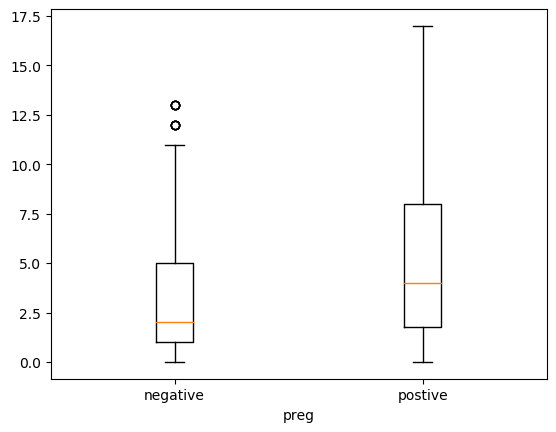

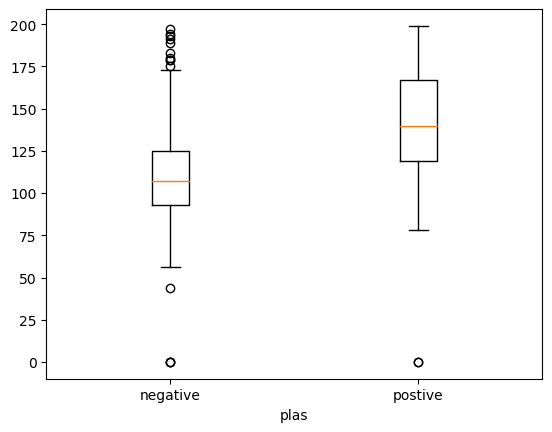

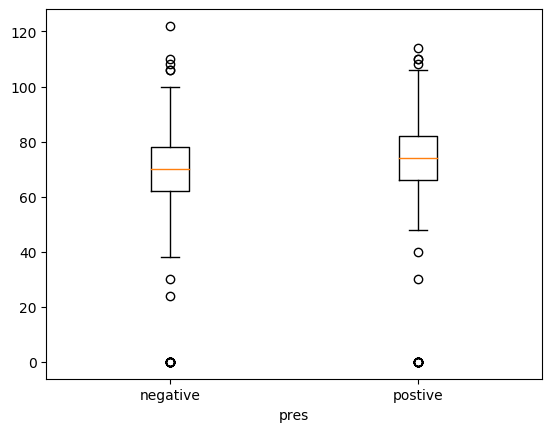

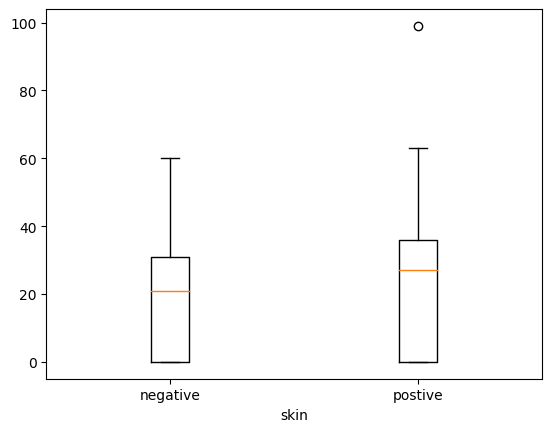

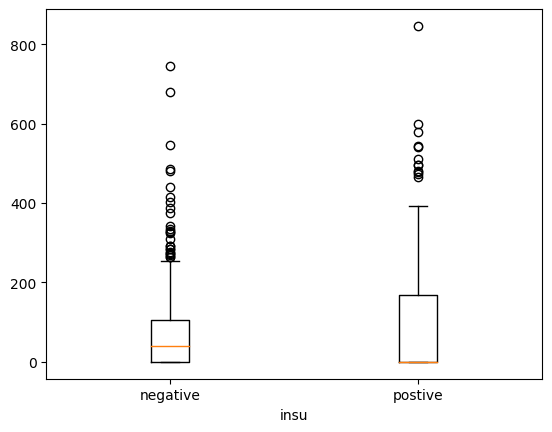

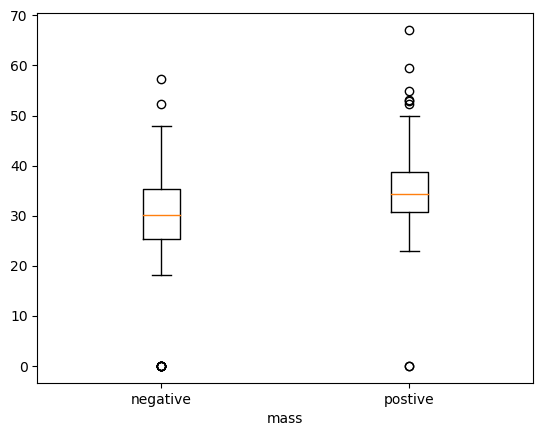

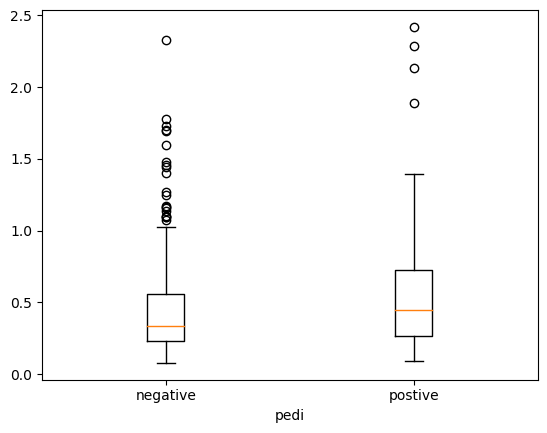

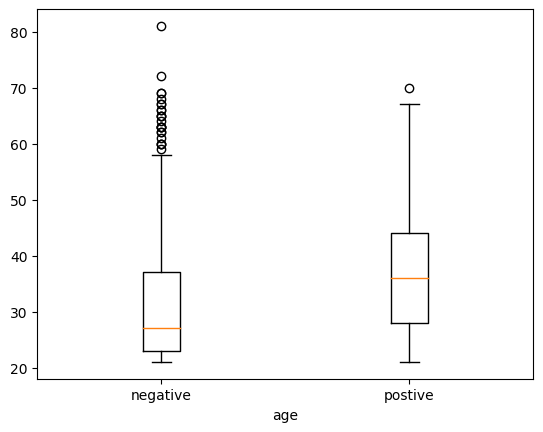

In [15]:
#now repeat boxplots for the two classes
labels = ('negative', 'postive')
for i in range(len(df.columns)-1):
    data = [df_tneg[df_tneg.columns[i]], df_tpos[df_tpos.columns[i]]]
    plt.figure()
    plt.boxplot(data)
    plt.xticks(np.arange(len(labels))+1, labels)
    plt.xlabel(df_tneg.columns[i])

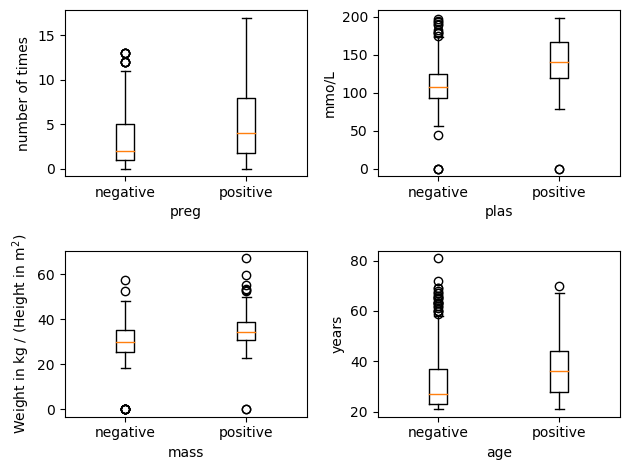

In [16]:
#do the plot for the report
fig, axs = plt.subplots(2,2)
dataf1 = [df_tneg[df_tneg.columns[0]], df_tpos[df_tpos.columns[0]]]
dataf2 = [df_tneg[df_tneg.columns[1]], df_tpos[df_tpos.columns[1]]]
dataf6 = [df_tneg[df_tneg.columns[5]], df_tpos[df_tpos.columns[5]]]
dataf8 = [df_tneg[df_tneg.columns[7]], df_tpos[df_tpos.columns[7]]]
axs[0, 0].set_xlabel(df_tneg.columns[0])
axs[0, 0].set_ylabel('number of times')
axs[0, 0].boxplot(dataf1)
axs[0, 0].set_xticks([1,2])
axs[0, 0].set_xticklabels(['negative', 'positive'])
axs[0, 1].set_xlabel(df_tneg.columns[1])
axs[0, 1].set_ylabel('mmo/L')
axs[0, 1].boxplot(dataf2)
axs[0, 1].set_xticks([1,2])
axs[0, 1].set_xticklabels(['negative', 'positive'])
axs[1, 0].set_xlabel(df_tneg.columns[5])
axs[1, 0].set_ylabel(r'Weight in kg / (Height in m$\mathregular{^{2}}$)')
axs[1, 0].boxplot(dataf6)
axs[1, 0].set_xticks([1,2])
axs[1, 0].set_xticklabels(['negative', 'positive'])
axs[1, 1].set_xlabel(df_tneg.columns[7])
axs[1, 1].set_ylabel('years')
axs[1, 1].boxplot(dataf8)
axs[1, 1].set_xticks([1,2])
axs[1, 1].set_xticklabels(['negative', 'positive'])
plt.tight_layout()
plt.savefig('boxplots-4-features.png')

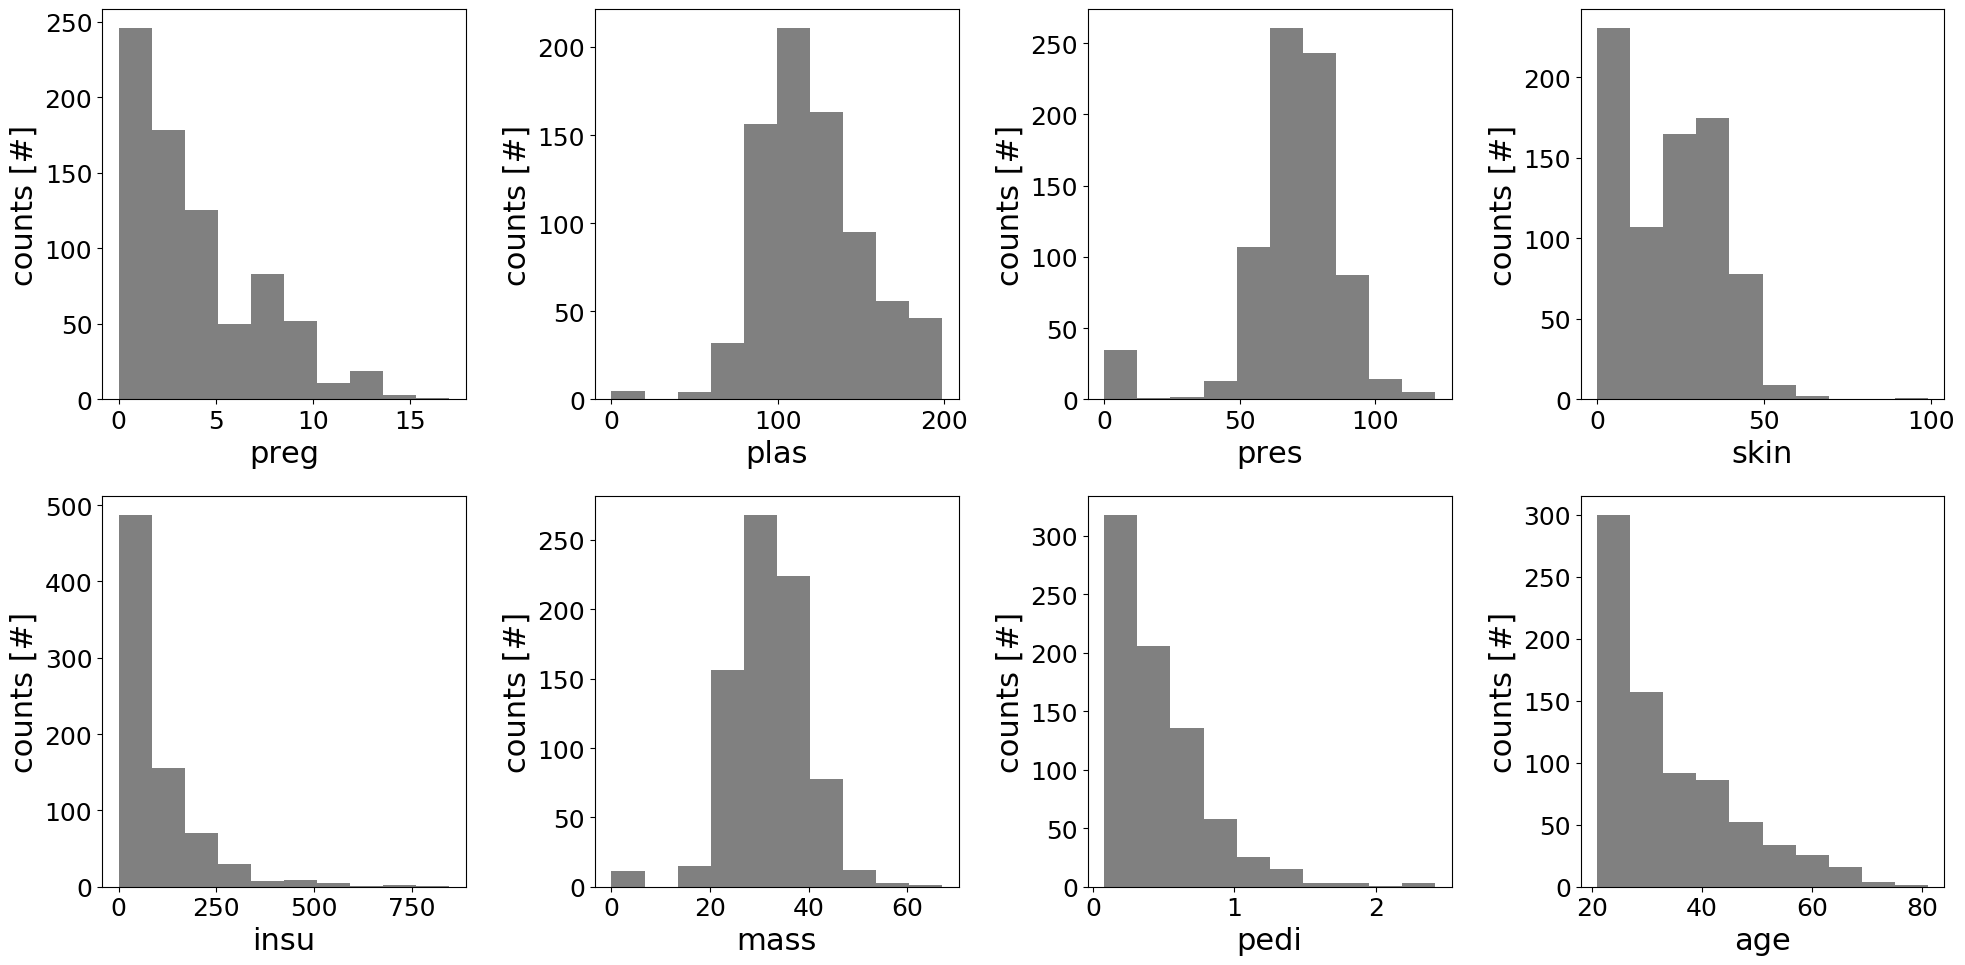

In [18]:
#all eight on subplots
#plt.figure()
#plt.hist(df[df.columns[0]], color = 'lightgrey')
#plt.ylabel('counts [#]')
#plt.xlabel(df.columns[0])
plt.rc('font', size=18)
fig, axs = plt.subplots(2,4, figsize=(20,10))
for i in range(len(df.columns)-1):
    if i < 4:
        axs[0, i].set_xlabel(df.columns[i], size = 22)
        axs[0, i].set_ylabel('counts [#]', size = 22)
        axs[0, i].hist(df[df.columns[i]], color = 'grey')
    else:
        axs[1, i-4].set_xlabel(df.columns[i], size =22)
        axs[1, i-4].set_ylabel('counts [#]', size = 22)
        axs[1, i-4].hist(df[df.columns[i]], color = 'grey')
plt.tight_layout()
plt.savefig('8-histograms.png')

In [19]:
#import to get logistic regression model
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [20]:
#run a logistic model (dependent variable is binary, categorical, first with the zeros, removed, we continue later with mean inside
cols=["preg", "plas","pres","skin","insu", "mass","pedi", "age"]
X=train[cols]
coly=['class']
y=train[coly] #this should normally do: y = df['class']

In [21]:
## Importing stats models for running logistic regression
import statsmodels.api as sm
## Defining the model and assigning Y (Dependent) and X (Independent Variables)
logit_model=sm.Logit(y,X)
## Fitting the model and publishing the results
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.613659
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  614
Model:                          Logit   Df Residuals:                      606
Method:                           MLE   Df Model:                            7
Date:                Sun, 22 Dec 2019   Pseudo R-squ.:                 0.04626
Time:                        10:44:44   Log-Likelihood:                -376.79
converged:                       True   LL-Null:                       -395.06
Covariance Type:            nonrobust   LLR p-value:                 5.698e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
preg           0.1005      0.031      3.204      0.001       0.039       0.162
plas           0.0116      0.

In [22]:
#remove the features with the high p values
cols2=["preg", "plas","pres","pedi"]
X=train[cols2]

In [23]:
logit_model=sm.Logit(y,X)
result2=logit_model.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.616248
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  614
Model:                          Logit   Df Residuals:                      610
Method:                           MLE   Df Model:                            3
Date:                Sun, 22 Dec 2019   Pseudo R-squ.:                 0.04224
Time:                        10:45:36   Log-Likelihood:                -378.38
converged:                       True   LL-Null:                       -395.06
Covariance Type:            nonrobust   LLR p-value:                 2.685e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
preg           0.0777      0.027      2.913      0.004       0.025       0.130
plas           0.0113      0.

In [24]:
#kick out pedi as well
cols3=["preg", "plas","pres"]
X=train[cols3]

In [25]:
logit_model=sm.Logit(y,X)
result3=logit_model.fit()
print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.617191
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  614
Model:                          Logit   Df Residuals:                      611
Method:                           MLE   Df Model:                            2
Date:                Sun, 22 Dec 2019   Pseudo R-squ.:                 0.04077
Time:                        10:46:09   Log-Likelihood:                -378.96
converged:                       True   LL-Null:                       -395.06
Covariance Type:            nonrobust   LLR p-value:                 1.010e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
preg           0.0756      0.027      2.846      0.004       0.024       0.128
plas           0.0121      0.

R2 is 0.61, only explains 61% of the variance, but is a start

In [26]:
#get to confusion matrix et al
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
cols3=["preg", "plas","pres"]
X=test[cols3]
coly=['class']
y=test[coly]
logreg.fit(X,y)
## Defining the y_pred variable for the predicting values. I have taken 392 dia dataset. We can also take a test dataset
y_pred=logreg.predict(X)
## Calculating the precision of the model
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.79        97
           1       0.66      0.54      0.60        57

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



C:\Users\oxsan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\oxsan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[81 16]
 [26 31]]


In [28]:
(93+26)/(93+26+25+10)

0.7727272727272727

dont know what happened. log seems to yield different result whenever i run it. for the report i had the following figures
(93+26)/(93+26+25+10)
0.7727272727272727

this time the distribution of train and test might be different